<a href="https://colab.research.google.com/github/u6yuvi/Applied-Machine-Learning/blob/main/feature_selection/Feature-Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Points to Note:

1. Model Interpretation or Explanation is not Causal Inference.i.e We cannot  draw a conclusion that a specific treatment (i.e., intervention) independent features(X) was the “cause” of the effect (or outcome)(Y) that was observed.
2. There are two types of explanations for Black Box Models:
  1. Global Explanations(will be the focus of this notebook.)
    1. It explains how does the output depend on the input feature for the whole dataset.
  2. Local Explanations
    1. It talks about a single datapoint and explains why a particular data point was classified in a particular way.
3. Explaining the model is not same as explaining the data.Model inspection only tells you about the model and the model might not accurately reflect the data.
4. First level of interpretation of the models is to look for feature importance to the model.It falls under the global explanation of the models umbrella.It is generally a naive way and should be handled with care.
5. For linear models(interpretable model), we can use coeff_ in scikit learn used for feature importance.
6. For tree based models,we can use feature_importances_ in scikit-learn for feature importance. 
7. Feature importance in the tree based models are a fast approximations but can be biased due to use of training set statistics. It generally captures the mean impurity decrease based on a feature on the training set when we fit the model.
8. There are better ways to calculating unbiased feature importances.For eg.
9. For linear model coefficient:
  1. Relative importance only meaningful after scaling
  2. Correlation among features might make coefficients completely uninterpretable
  3. L1 regularization will pick one at random from a correlated group
  4. Any penalty will invalidate usual interpretation of linear coefficients

10. Feature Selection Techniques:
  1. Drop Feature Importance:<br>
  $I^i_{drop}$=$Acc(f,X,y)$−$Acc(f^′,X−i,y)$ <br>
  Importance of a feature  is calculated by comparing the drop in the accuracy when we train the model with and without the feature. 
      1. Cannot deal with correlated features well.For eg. Consider a case where we have two copies of a feature that is highly informative in the data,the model(f) will pick one of the feature and has a very high accuracy.When we drop this feature in model($f^{'}$) the other feature would try to fill in and accuracy would still be higher and hence the the drop feature importance will be lower as the other feature will compensate for it. As a result , this technique will not tell us which feature to use in the model.
      2. It explains more about the data and less about the model.  
      3. Can be used for the feature selection in case of non correlated features.
      4. Very slow due to retraining of the model.

  2. Permutation Importance: Measure Marginal Influence of one feature.

  $I^{perm}_i=Acc(f,X,y)−E_{x_i}[Acc(f(x_i,X_{−i}),y)]$
    1. Instead of replacing a feature,we replace it with an uninformative variant by shuffling the feature values without considering other feature values.This helps in destroying any relation that this feature has with the target variable but retaining the data distribution. 
    2. Faster than Drop Feature Importance as No refitting of the model on the training data,but applied on validation set given trained estimator.

Motivation for Feature Selection

1. Reduce overfitting and give better models.<br>
But based on my experience,I am not sure how much it is true in practice due to the following reasons:
  1. Mostly we add features in the model assuming it is important.And even if this feature is not important,most models can actually learn features which are not important. 
  2. Very rarely I found automatic feature selection improving the model accuracy.
2. Faster prediction and training.
3. Less storage for model and dataset
4. More interpretable model

Types of Feature Selection
1. Unsupervised vs Supervised
2. Univariate vs Multivariate
3. Model based or not

Unsupervised Techniques:
Points to Note:

1. May discard important information.
2. Variance-based: 0 variance or mostly constant features are dropped.
3. Covariance-based: remove correlated features,but in predictive modeling it might discard information.
4. PCA: remove linear subspaces instead of individual features in a way that it preserves as much of the information as possible.But downside is the feature is not interpretable.

Supervised Feature Selection

1. Univariate Statistic -- Pick Statisitic,check p-value
  1. Paramteric Methods,looks for linear relationship i.e coorelations
    1. f_regression
    2. f_classsif
    3. chi2
  2. Non parametric Methods, k-nearest neighbour based method,can works on non-linear relationships.
    1. Mutual Information



Getting the dataset

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp /content/drive/MyDrive/Colab\ Notebooks/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install  kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!kaggle datasets list

ref                                                                   title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
victorsoeiro/netflix-tv-shows-and-movies                              Netflix TV Shows and Movies                           2MB  2022-05-15 00:01:23           6355        198  1.0              
surajjha101/stores-area-and-sales-data                                Supermarket store branches sales analysis            10KB  2022-04-29 11:10:16           5594        162  1.0              
devansodariya/student-performance-data                                Student Performance Dataset                           7KB  2022-05-26 13:55:09           2562        118  0.9705882        
paradisejoy/top-hits-spotify-f

In [ ]:
!kaggle competitions download -c santander-customer-satisfaction

 61% 5.00M/8.25M [00:00<00:00, 40.3MB/s]
100% 8.25M/8.25M [00:00<00:00, 60.3MB/s]


In [ ]:
!ls

drive  sample_data  santander-customer-satisfaction.zip


In [ ]:
!unzip -q santander-customer-satisfaction.zip

In [ ]:
!ls

drive	     sample_submission.csv		  test.csv   tree.png
sample_data  santander-customer-satisfaction.zip  train.csv


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
!pip3 install pydotplus
!pip3 install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip3 install probatus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 117 kB 8.9 MB/s 
     |████████████████████████████████| 352 kB 44.4 MB/s 
  Created wheel for shap: filename=shap-0.38.1-cp37-cp37m-linux_x86_64.whl size=490552 sha256=25a95e5f65d8653b3bf206a22df8224aaf3344d2c5ab3f6e8315b35f191c974d
  Stored in directory: /root/.cache/pip/wheels/34/33/98/2c03c2e06312e616f7a8dad3fbbcc78fc9eb1d665abcef1060
Successfully built shap


In [ ]:
import numpy as np
import pandas as pd
import scipy
from pathlib import Path
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
!pip3 install yellowbrick==1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 271 kB 9.8 MB/s 
     |████████████████████████████████| 14.8 MB 59.4 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: yellowbrick
    Found existing installation: yellowbrick 1.4
    Uninstalling yellowbrick-1.4:
      Successfully uninstalled yellowbrick-1.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.19.5 which is incompatible.
tensorflow 2.8.2+zzzcolab20220527125636 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatibl

In [ ]:
!pip3 install graphviz
!apt-get install graphviz -y

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
from pydotplus import graph_from_dot_data
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz

In [ ]:
from sklearn.metrics import make_scorer, f1_score, roc_auc_score, \
recall_score, precision_score, average_precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score,\
cross_validate
from sklearn.inspection import permutation_importance
from sklearn.model_selection import StratifiedKFold
pd.set_option('display.float_format',lambda x: '%.3f'%x)

In [ ]:
data = pd.read_csv("train.csv")
data.shape

(76020, 371)

In [ ]:
data.head()

ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
0   1     2     23               0.000                    0.000   
1   3     2     34               0.000                    0.000   
2   4     2     23               0.000                    0.000   
3   8     2     37               0.000                  195.000   
4  10     2     39               0.000                    0.000   

   imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
0                    0.000                    0.000                    0.000   
1                    0.000                    0.000                    0.000   
2                    0.000                    0.000                    0.000   
3                  195.000                    0.000                    0.000   
4                    0.000                    0.000                    0.000   

   imp_op_var40_efect_ult1  imp_op_var40_efect_ult3  ...  \
0                    0.000                    0.000  ...   
1                    0.000                    0.000  ...   
2                    0.000                    0.000  ...   
3                    0.000                    0.000  ...   
4                    0.000                    0.000  ...   

   saldo_medio_var33_hace2  saldo_medio_var33_hace3  saldo_medio_var33_ult1  \
0                    0.000                    0.000                   0.000   
1                    0.000                    0.000                   0.000   
2                    0.000                    0.000                   0.000   
3                    0.000                    0.000                   0.000   
4                    0.000                    0.000                   0.000   

   saldo_medio_var33_ult3  saldo_medio_var44_hace2  saldo_medio_var44_hace3  \
0                   0.000                    0.000                    0.000   
1                   0.000                    0.000                    0.000   
2                   0.000                    0.000                    0.000   
3                   0.000                    0.000                    0.000   
4                   0.000                    0.000                    0.000   

   saldo_medio_var44_ult1  saldo_medio_var44_ult3      var38  TARGET  
0                   0.000                   0.000  39205.170       0  
1                   0.000                   0.000  49278.030       0  
2                   0.000                   0.000  67333.770       0  
3                   0.000                   0.000  64007.970       0  
4                   0.000                   0.000 117310.979       0  

[5 rows x 371 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [ ]:
X = data.drop("TARGET",axis=1)

In [ ]:
Y = data.TARGET

### Check for Imbalanced Dataset

Dataset is highly imbalanced

In [ ]:
np.bincount(Y)/len(Y)

array([0.96043147, 0.03956853])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X,_,Y,_ = train_test_split(X,Y, train_size = 0.3,stratify=Y,random_state = 123)

In [ ]:
X = X.reset_index(drop = True)
Y = Y.reset_index(drop=True)

In [ ]:
X.shape

(22806, 370)

## Univariate Feature Selection

### Variance Threshold

Removes all features whose variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e. features that have the same value in all samples.

s an example, suppose that we have a dataset with boolean features, and we want to remove all features that are either one or zero (on or off) in more than 80% of the samples. Boolean features are Bernoulli random variables, and the variance of such variables is given by


Let's remove the features that have the same value in all samples i.e with zero variance and keep features with non zero variance

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
len(X.columns)

370

In [ ]:
sel = VarianceThreshold()
sel.fit(X)

VarianceThreshold()

In [ ]:
len(sel.get_feature_names_out())

308

In [ ]:
feats_with_zero_var = X.columns[~sel.get_support()]
feats_with_zero_var

Index(['ind_var2_0', 'ind_var2', 'ind_var13_medio_0', 'ind_var13_medio',
       'ind_var18_0', 'ind_var18', 'ind_var27_0', 'ind_var28_0', 'ind_var28',
       'ind_var27', 'ind_var41', 'ind_var46_0', 'ind_var46',
       'num_var13_medio_0', 'num_var13_medio', 'num_var18_0', 'num_var18',
       'num_op_var40_hace3', 'num_var27_0', 'num_var28_0', 'num_var28',
       'num_var27', 'num_var41', 'num_var46_0', 'num_var46',
       'saldo_var13_medio', 'saldo_var18', 'saldo_var28', 'saldo_var27',
       'saldo_var41', 'saldo_var46', 'delta_imp_amort_var18_1y3',
       'delta_imp_trasp_var33_out_1y3', 'delta_num_trasp_var33_out_1y3',
       'imp_amort_var18_hace3', 'imp_amort_var18_ult1',
       'imp_amort_var34_hace3', 'imp_reemb_var13_hace3',
       'imp_reemb_var33_hace3', 'imp_trasp_var17_in_hace3',
       'imp_trasp_var17_out_hace3', 'imp_trasp_var33_in_ult1',
       'imp_trasp_var33_out_hace3', 'imp_trasp_var33_out_ult1',
       'imp_venta_var44_hace3', 'num_var2_0_ult1', 'num_var2_ult1',


We can check for one feature by counting the unique values.

In [ ]:
X['ind_var2_0'].value_counts()

0    22806
Name: ind_var2_0, dtype: int64

In [ ]:
print(f'Percentage of 0\'s {(X["ind_var2_0"].value_counts()/len(X)*100).values}')

Percentage of 0's [100.]


We can check for all the features with zero variance

In [ ]:
X[feats_with_zero_var].value_counts().to_frame()

0
ind_var2_0 ind_var2 ind_var13_medio_0 ind_var13_medio ind_var18_0 ind_var18 ind_var27_0 ind_var28_0 ind_var28 ind_var27 ind_var41 ind_var46_0 ind_var46 num_var13_medio_0 num_var13_medio num_var18_0 num_var18 num_op_var40_hace3 num_var27_0 num_var28_0 num_var28 num_var27 num_var41 num_var46_0 num_var46 saldo_var13_medio saldo_var18 saldo_var28 saldo_var27 saldo_var41 saldo_var46 delta_imp_amort_var18_1y3 delta_imp_trasp_var33_out_1y3 delta_num_trasp_var33_out_1y3 imp_amort_var18_hace3 imp_amort_var18_ult1 imp_amort_var34_hace3 imp_reemb_var13_hace3 imp_reemb_var33_hace3 imp_trasp_var17_in_hace3 imp_trasp_var17_out_hace3 imp_trasp_var33_in_ult1 imp_trasp_var33_out_hace3 imp_trasp_var33_out_ult1 imp_venta_var44_hace3 num_var2_0_ult1 num_var2_ult1 num_meses_var13_medio_ult3 num_reemb_var13_hace3 num_reemb_var33_hace3 num_trasp_var17_in_hace3 num_trasp_var17_out_hace3 num_trasp_var33_in_ult1 num_trasp_var33_out_hace3 num_trasp_var33_out_ult1 num_venta_var44_hace3 saldo_var2_ult1 saldo_medio_var13_medio_hace2 saldo_medio_var13_medio_hace3 saldo_medio_var13_medio_ult1 saldo_medio_var13_medio_ult3 saldo_medio_var29_hace3       
0          0        0                 0               0           0         0           0           0         0         0         0           0         0                 0               0           0         0                  0           0           0         0         0         0           0         0                 0           0           0           0           0           0                         0                             0                             0                     0.000                0                     0                     0                     0.000                    0                         0.000                   0                         0                        0.000                 0               0             0                          0                     0                     0                        0                         0                       0                         0                        0                     0               0.000                         0                             0                            0.000                        0.000                    22806

In [ ]:
X = X.drop(feats_with_zero_var,axis=1)
X.shape

(22806, 308)

Reduced the feature set from 370 to 336.


In [ ]:
from sklearn.feature_selection import GenericUnivariateSelect, f_classif, mutual_info_classif

In [ ]:
def GenericUnivariateSelect_(score_fnc, X,y):
    selector = GenericUnivariateSelect(f_classif)
    selector.fit(X,y)
    scores = -np.log10(selector.pvalues_)
    scores /= scores.max()
    #-Log(p-score)
    univariate_cols = list(zip(X.columns,selector.pvalues_))
    uni_df = pd.DataFrame(univariate_cols,columns = ['f_names','neg_log_pvalue']).sort_values(by = 'neg_log_pvalue',ascending=False)
    uni_df.plot('f_names', 'neg_log_pvalue', 'barh', figsize=(12,X.shape[1]/4.2), legend=False)
    return uni_df

f_names  neg_log_pvalue
212        ind_var9_cte_ult1           0.966
6    imp_op_var40_comer_ult1           0.935
39                 ind_var17           0.923
10         imp_op_var40_ult1           0.920
113        num_op_var39_ult3           0.916
232       num_med_var22_ult3           0.903
260       num_sal_var16_ult1           0.888
110       num_op_var39_hace2           0.886
38               ind_var17_0           0.861
109        num_op_var41_ult3           0.860

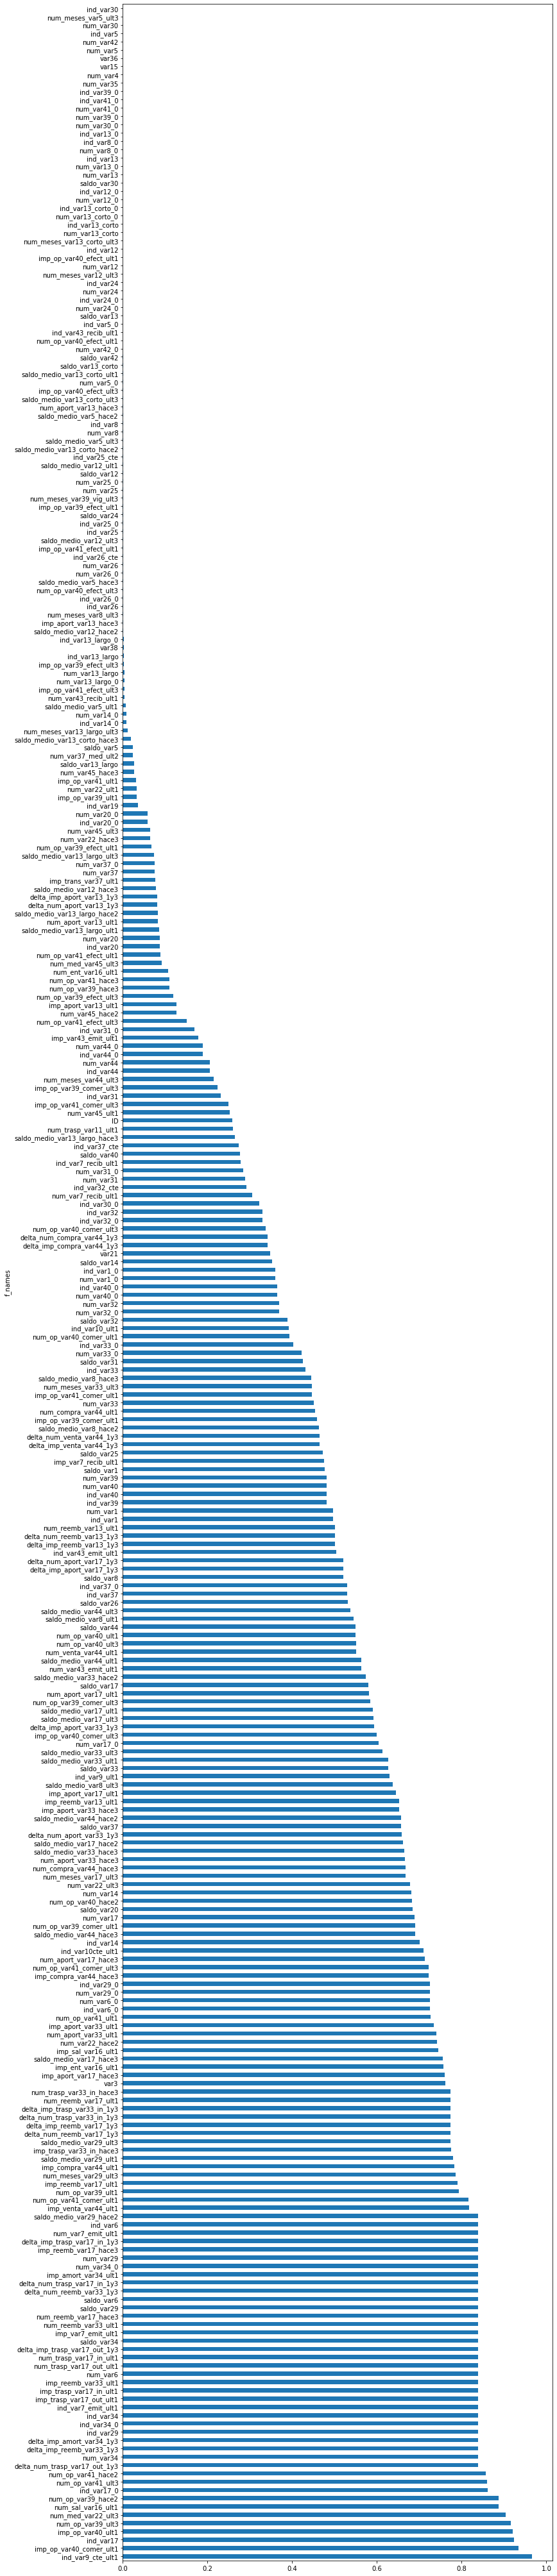

In [ ]:
scores = GenericUnivariateSelect_(f_classif,X,Y)
scores[:10]

#### Tree Model Rules

In [ ]:
np.random.seed(123)
tree=DecisionTreeClassifier(class_weight='balanced',max_depth=3)
tree.fit(X,Y)

DecisionTreeClassifier(class_weight='balanced', max_depth=3)

In [ ]:
dot_data = export_graphviz(tree,filled = True,rounded = True,
                          class_names = ["0", "1"],
                          feature_names = X.columns,
                          out_file  =None)

In [ ]:
graph = graph_from_dot_data(dot_data)

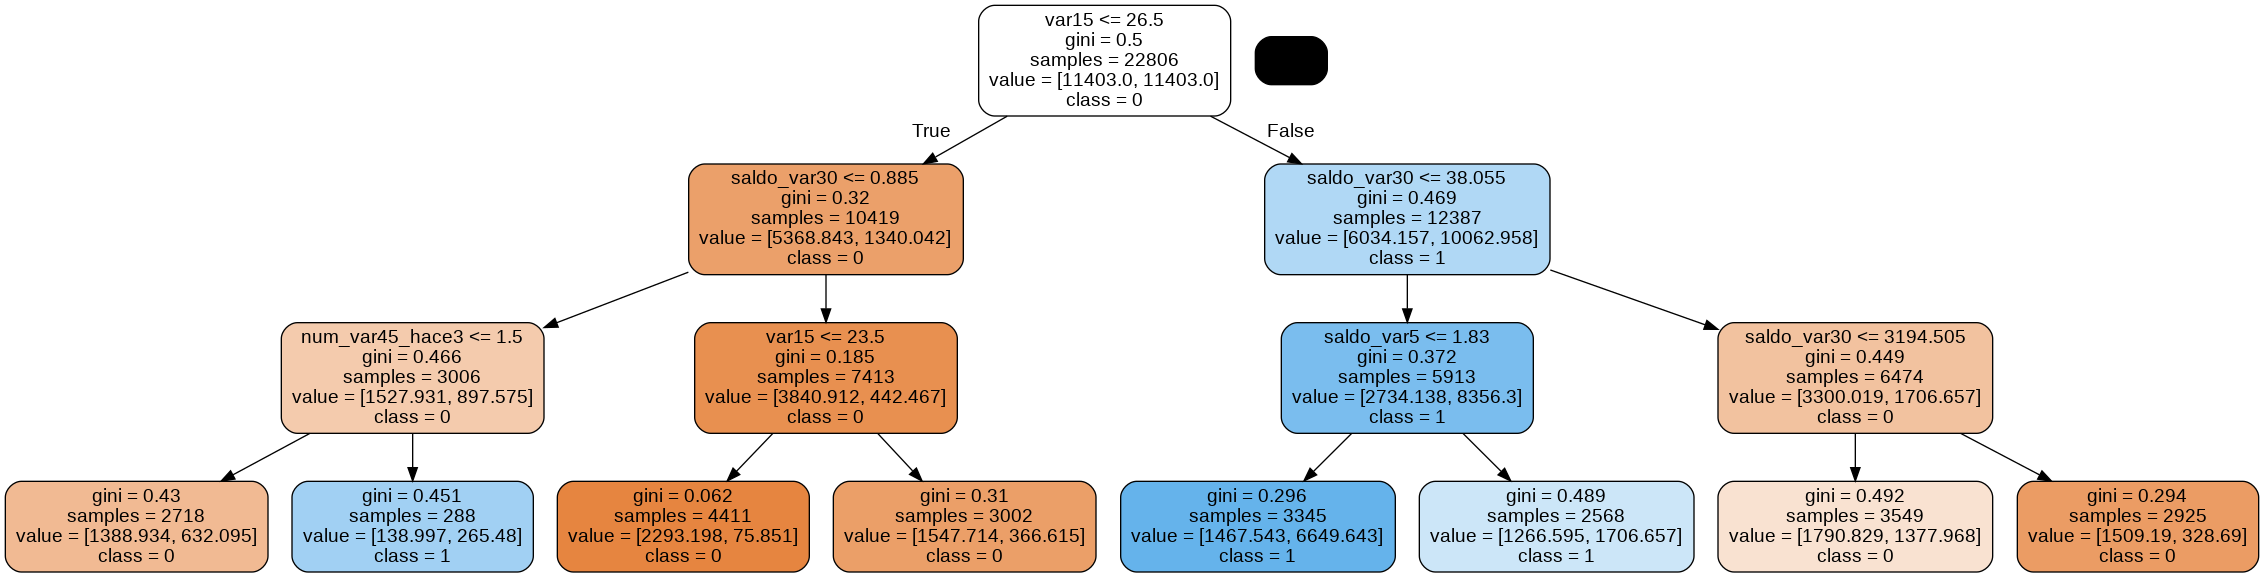

In [ ]:
graph.write_png('tree.png')
from IPython.display import Image
Image('tree.png',height =800,width = 2000)

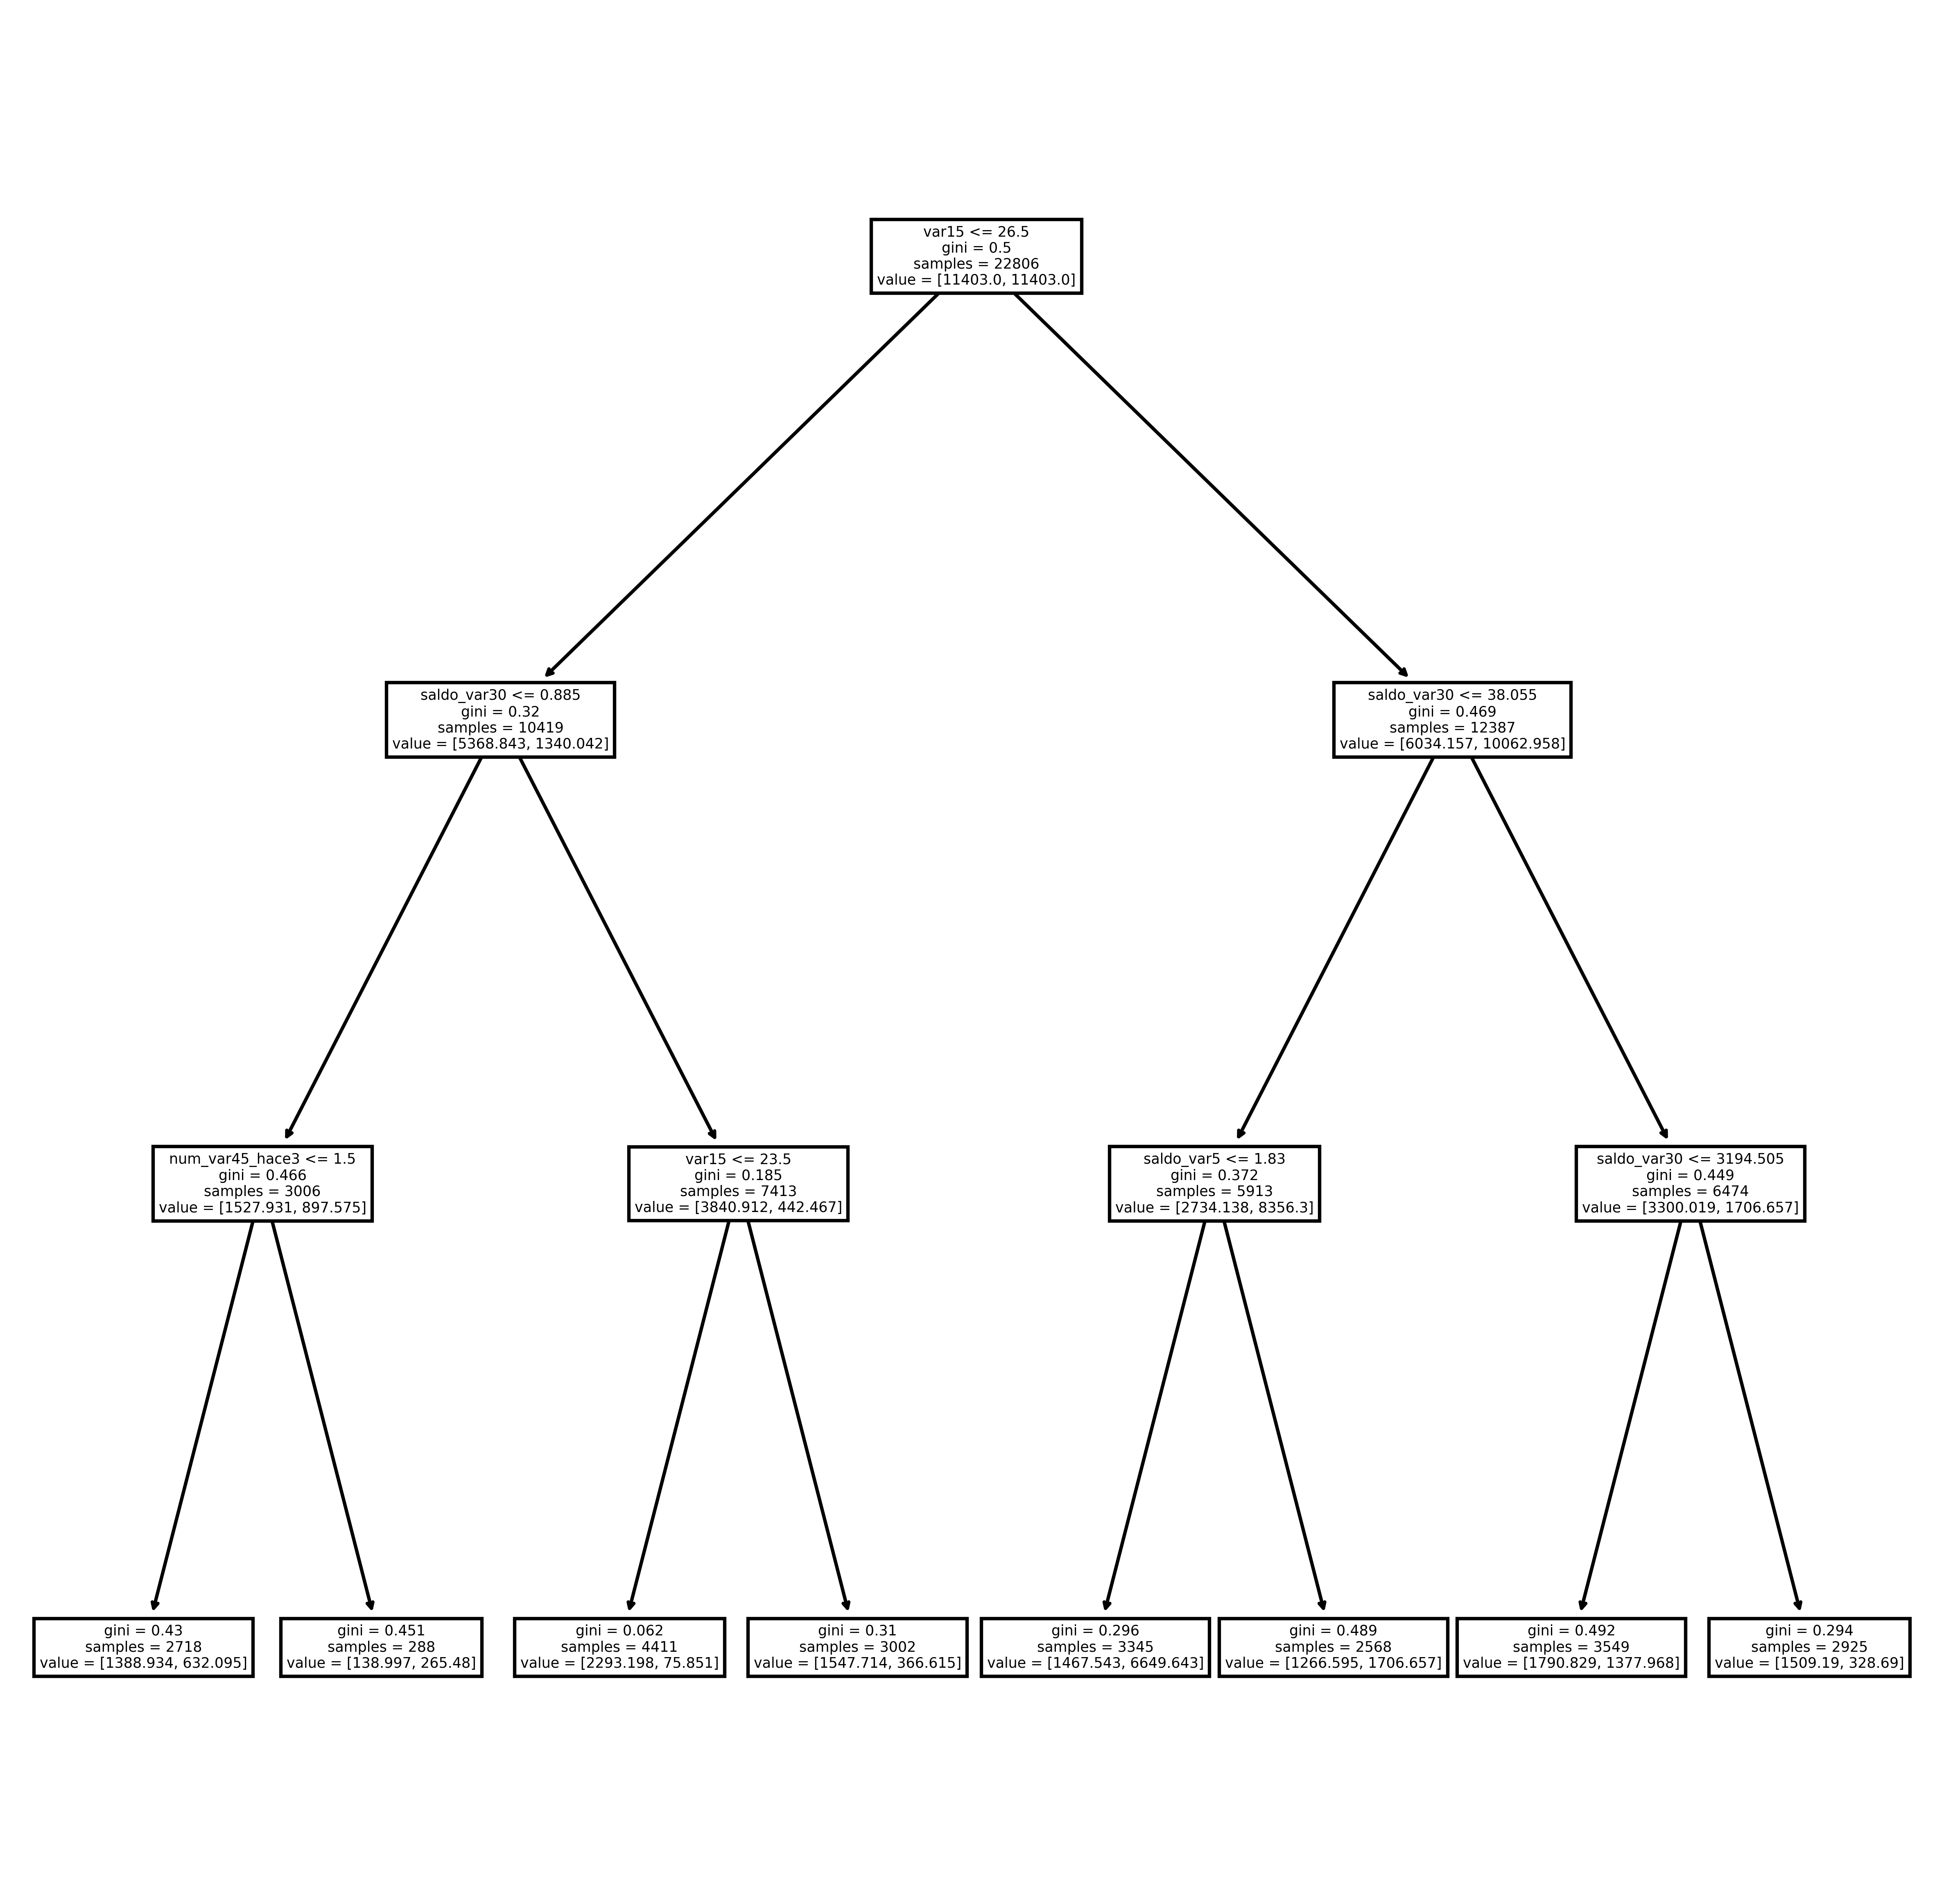

In [ ]:
plt.figure(figsize=(10, 10), dpi=600)
tree_dot = plot_tree(tree, feature_names=X.columns)

In [ ]:
scorer_f1 = make_scorer(f1_score, greater_is_better=True)
scorer_auc = make_scorer(roc_auc_score, greater_is_better=True)
scorer_avg_precision = make_scorer(average_precision_score, greater_is_better=True)
scorer_precision = make_scorer(precision_score, greater_is_better=True)
scorer_recall = make_scorer(recall_score, greater_is_better=True)

In [ ]:
score = {'f1' :scorer_f1,
        'auc' :scorer_auc,
        'avg_prec' : scorer_avg_precision,
        'recall' : scorer_recall,
        'precision': scorer_precision}

In [ ]:
np.random.seed(123)
model = RandomForestClassifier(n_estimators = 100,class_weight='balanced',
                               min_samples_leaf=3,
                              criterion ='gini')


In [ ]:
# 10 fold cross validation
cv_score = cross_validate(model, 
                           X,
                           Y,
                           cv = StratifiedKFold(10,shuffle=True,random_state=123),
                            scoring =score)

In [ ]:
pd.DataFrame(cv_score)

fit_time  score_time  test_f1  test_auc  test_avg_prec  test_recall  \
0     3.728       0.069    0.275     0.739          0.122        0.589   
1     3.597       0.075    0.263     0.743          0.118        0.611   
2     3.579       0.064    0.222     0.688          0.091        0.500   
3     3.589       0.066    0.235     0.713          0.100        0.556   
4     3.654       0.066    0.220     0.696          0.092        0.527   
5     3.689       0.080    0.213     0.668          0.085        0.451   
6     3.644       0.068    0.259     0.717          0.110        0.544   
7     3.549       0.080    0.246     0.721          0.106        0.567   
8     3.755       0.075    0.235     0.712          0.100        0.556   
9     3.912       0.069    0.227     0.690          0.093        0.500   

   test_precision  
0           0.179  
1           0.168  
2           0.143  
3           0.149  
4           0.139  
5           0.139  
6           0.170  
7           0.157  
8           0.149  
9           0.147

In [ ]:
model.fit(X,Y)

RandomForestClassifier(class_weight='balanced', min_samples_leaf=3)

#### Random Forest Model Importance

In [ ]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'features':df.columns, 'importance':m.feature_importances_}).sort_values('importance', ascending=False)

In [ ]:
#Feature Importance
fi=rf_feat_importance(model,X);fi[:30]

features  importance
2                       var15       0.150
307                     var38       0.059
273    saldo_medio_var5_hace3       0.048
161               saldo_var42       0.048
0                          ID       0.043
275     saldo_medio_var5_ult3       0.040
274     saldo_medio_var5_ult1       0.039
154               saldo_var30       0.039
140                saldo_var5       0.033
272    saldo_medio_var5_hace2       0.032
126                 num_var35       0.019
271            num_var45_ult3       0.018
234       num_meses_var5_ult3       0.017
23                   ind_var5       0.015
54                  ind_var30       0.015
231            num_var22_ult3       0.015
163                     var36       0.015
269           num_var45_hace3       0.014
76                   num_var4       0.013
268           num_var45_hace2       0.013
117                 num_var30       0.011
233        num_med_var45_ult3       0.011
229           num_var22_hace3       0.011
270            num_var45_ult1       0.010
242  num_meses_var39_vig_ult3       0.008
78                   num_var5       0.008
228           num_var22_hace2       0.008
230            num_var22_ult1       0.006
12    imp_op_var41_comer_ult3       0.006
203      imp_trans_var37_ult1       0.006

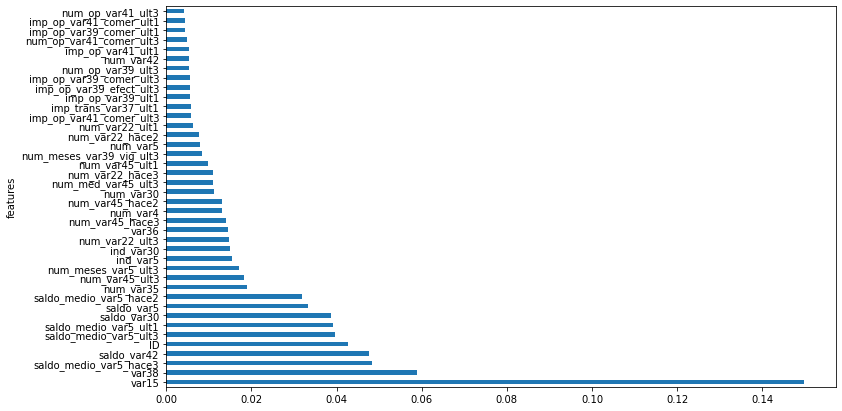

In [ ]:
def plot_fi(fi): return fi.plot('features', 'importance', 'barh', figsize=(12,7), legend=False)
plot_fi(fi[:40]);

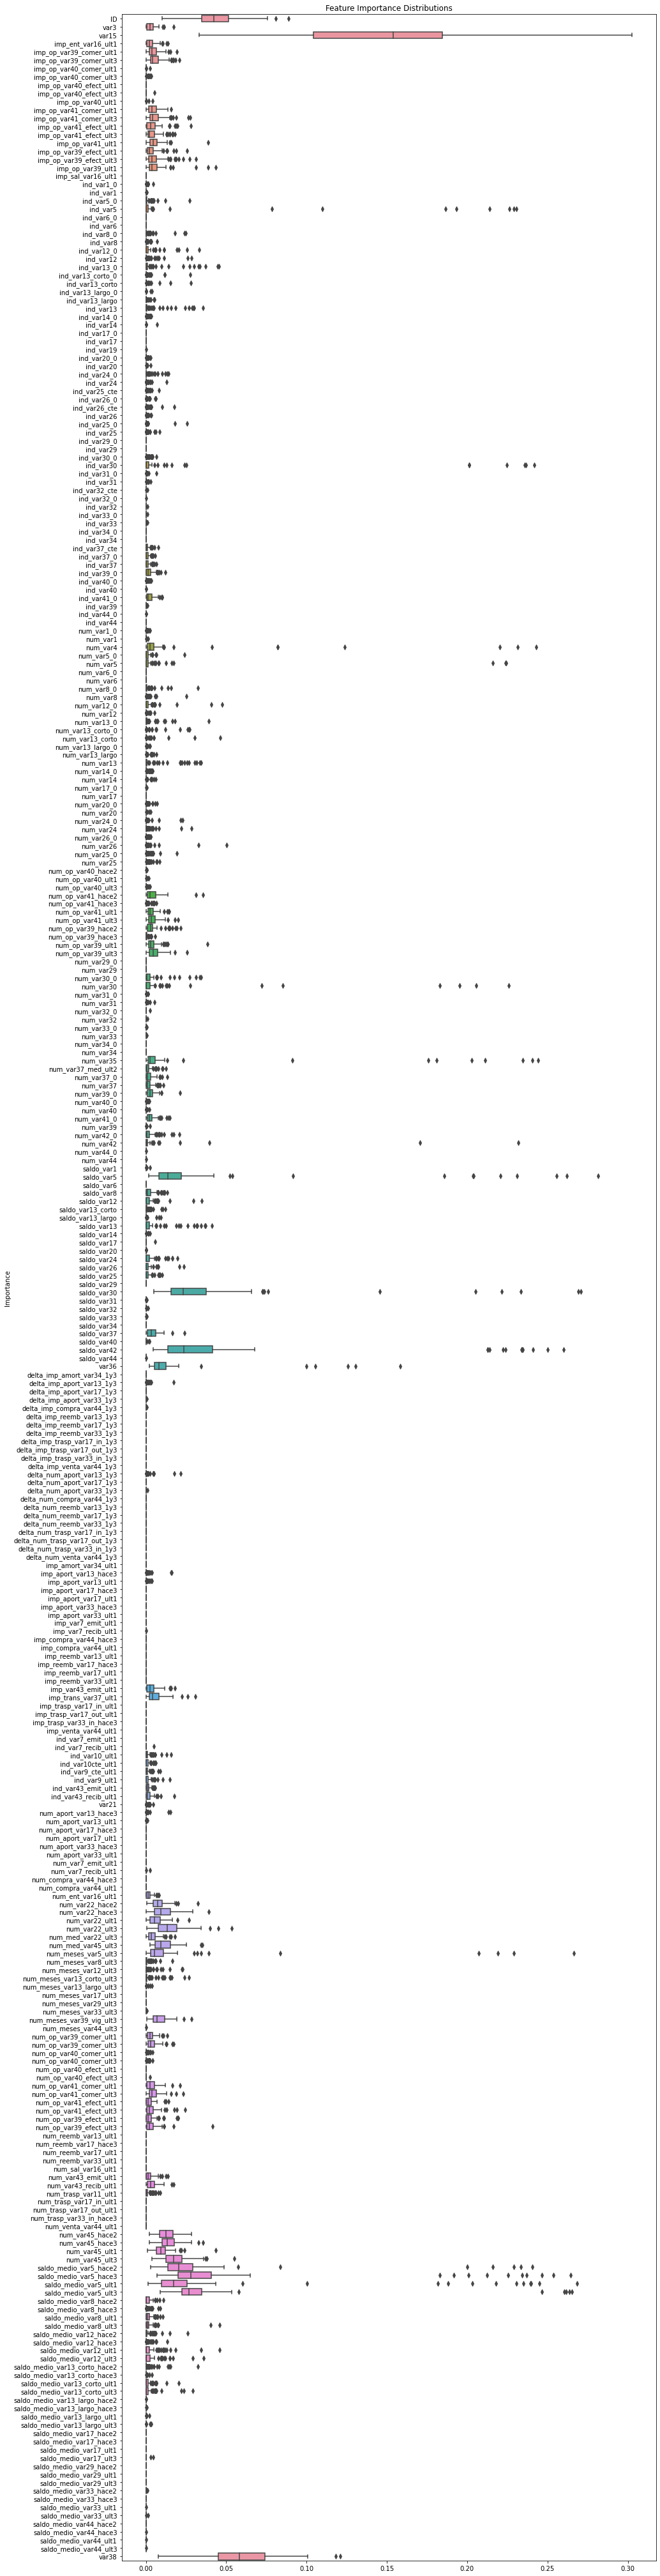

In [ ]:
# get the feature importances from each tree and then visualize the
# distributions as boxplots
plt.figure(figsize=(15,X.shape[1]/4.2))
all_feat_imp_df = pd.DataFrame(data=[tree.feature_importances_ for tree in 
                                     model],
                               columns=X.columns)

(sns.boxplot(data=all_feat_imp_df,orient="h")
        .set(title='Feature Importance Distributions',
             ylabel='Importance'));

### Split Dataset

In [ ]:
def get_split_info(X,Y,n_splits=5,test_size=0.2,random_state=123):
    
    sss = StratifiedKFold(n_splits =10)

#     sss = StratifiedShuffleSplit(n_splits=n_splits,
#                                  test_size=test_size,
#                                  random_state=random_state)
    sss.get_n_splits(X, Y)
    dataset_info = dict()
    for i, indexes in enumerate(sss.split(X, Y)):
        print("TRAIN:", len(indexes[0]), "TEST:", len(indexes[1]))
        dataset_info[str(i)] = {'train':indexes[0],'test': indexes[1]}
        #X_train, X_test = X.iloc[indexes[0],:], X.iloc[indexes[1],:]
        #y_train, y_test = Y[indexes[0]], Y[indexes[1]]
    return dataset_info

In [ ]:
dataset_info = get_split_info(X,Y.values)

TRAIN: 20525 TEST: 2281
TRAIN: 20525 TEST: 2281
TRAIN: 20525 TEST: 2281
TRAIN: 20525 TEST: 2281
TRAIN: 20525 TEST: 2281
TRAIN: 20525 TEST: 2281
TRAIN: 20526 TEST: 2280
TRAIN: 20526 TEST: 2280
TRAIN: 20526 TEST: 2280
TRAIN: 20526 TEST: 2280


In [ ]:
def generate_dist_plots(X =X ,dataset = None, f_name = None,label_name = None):
    #  Numerical or Categorical Data
    a = 10  # number of rows
    b = 2  # number of columns
    c = 1  # initialize plot counter
    fig = plt.figure(figsize=(15,8))
    sns.histplot(x = X[f_name],
             multiple = 'stack',
             hue = X[label_name]).set(title = f'{f_name} Distribution before splitting (n = {X.shape[0]}))');
    fig = plt.figure(figsize=(30,42))
    for i in range(0,len(dataset.keys())): # no of folds in split
        for index, j in enumerate(list(dataset[str(i)].keys())): # no of data subsets
            #print(f'fold {i}, dataset {j},index {index}')
            ax = plt.subplot(a, 2, c)
            data = X.iloc[dataset_info[str(i)][j],:]
            sns.histplot(data = data, x = f_name,
                 multiple = 'stack',
                 hue = label_name,ax = ax).set(title = f'Fold {i} {j} Dsitribution (n = {data.shape[0]})');
            c=c+1

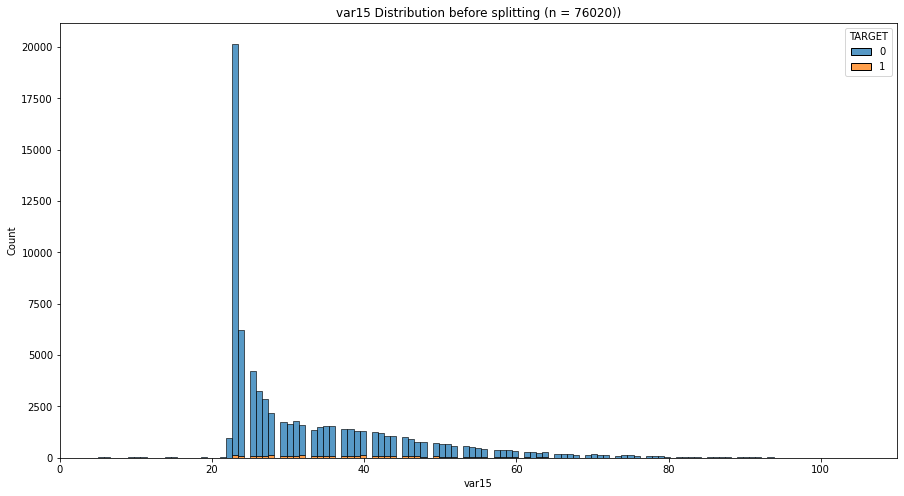

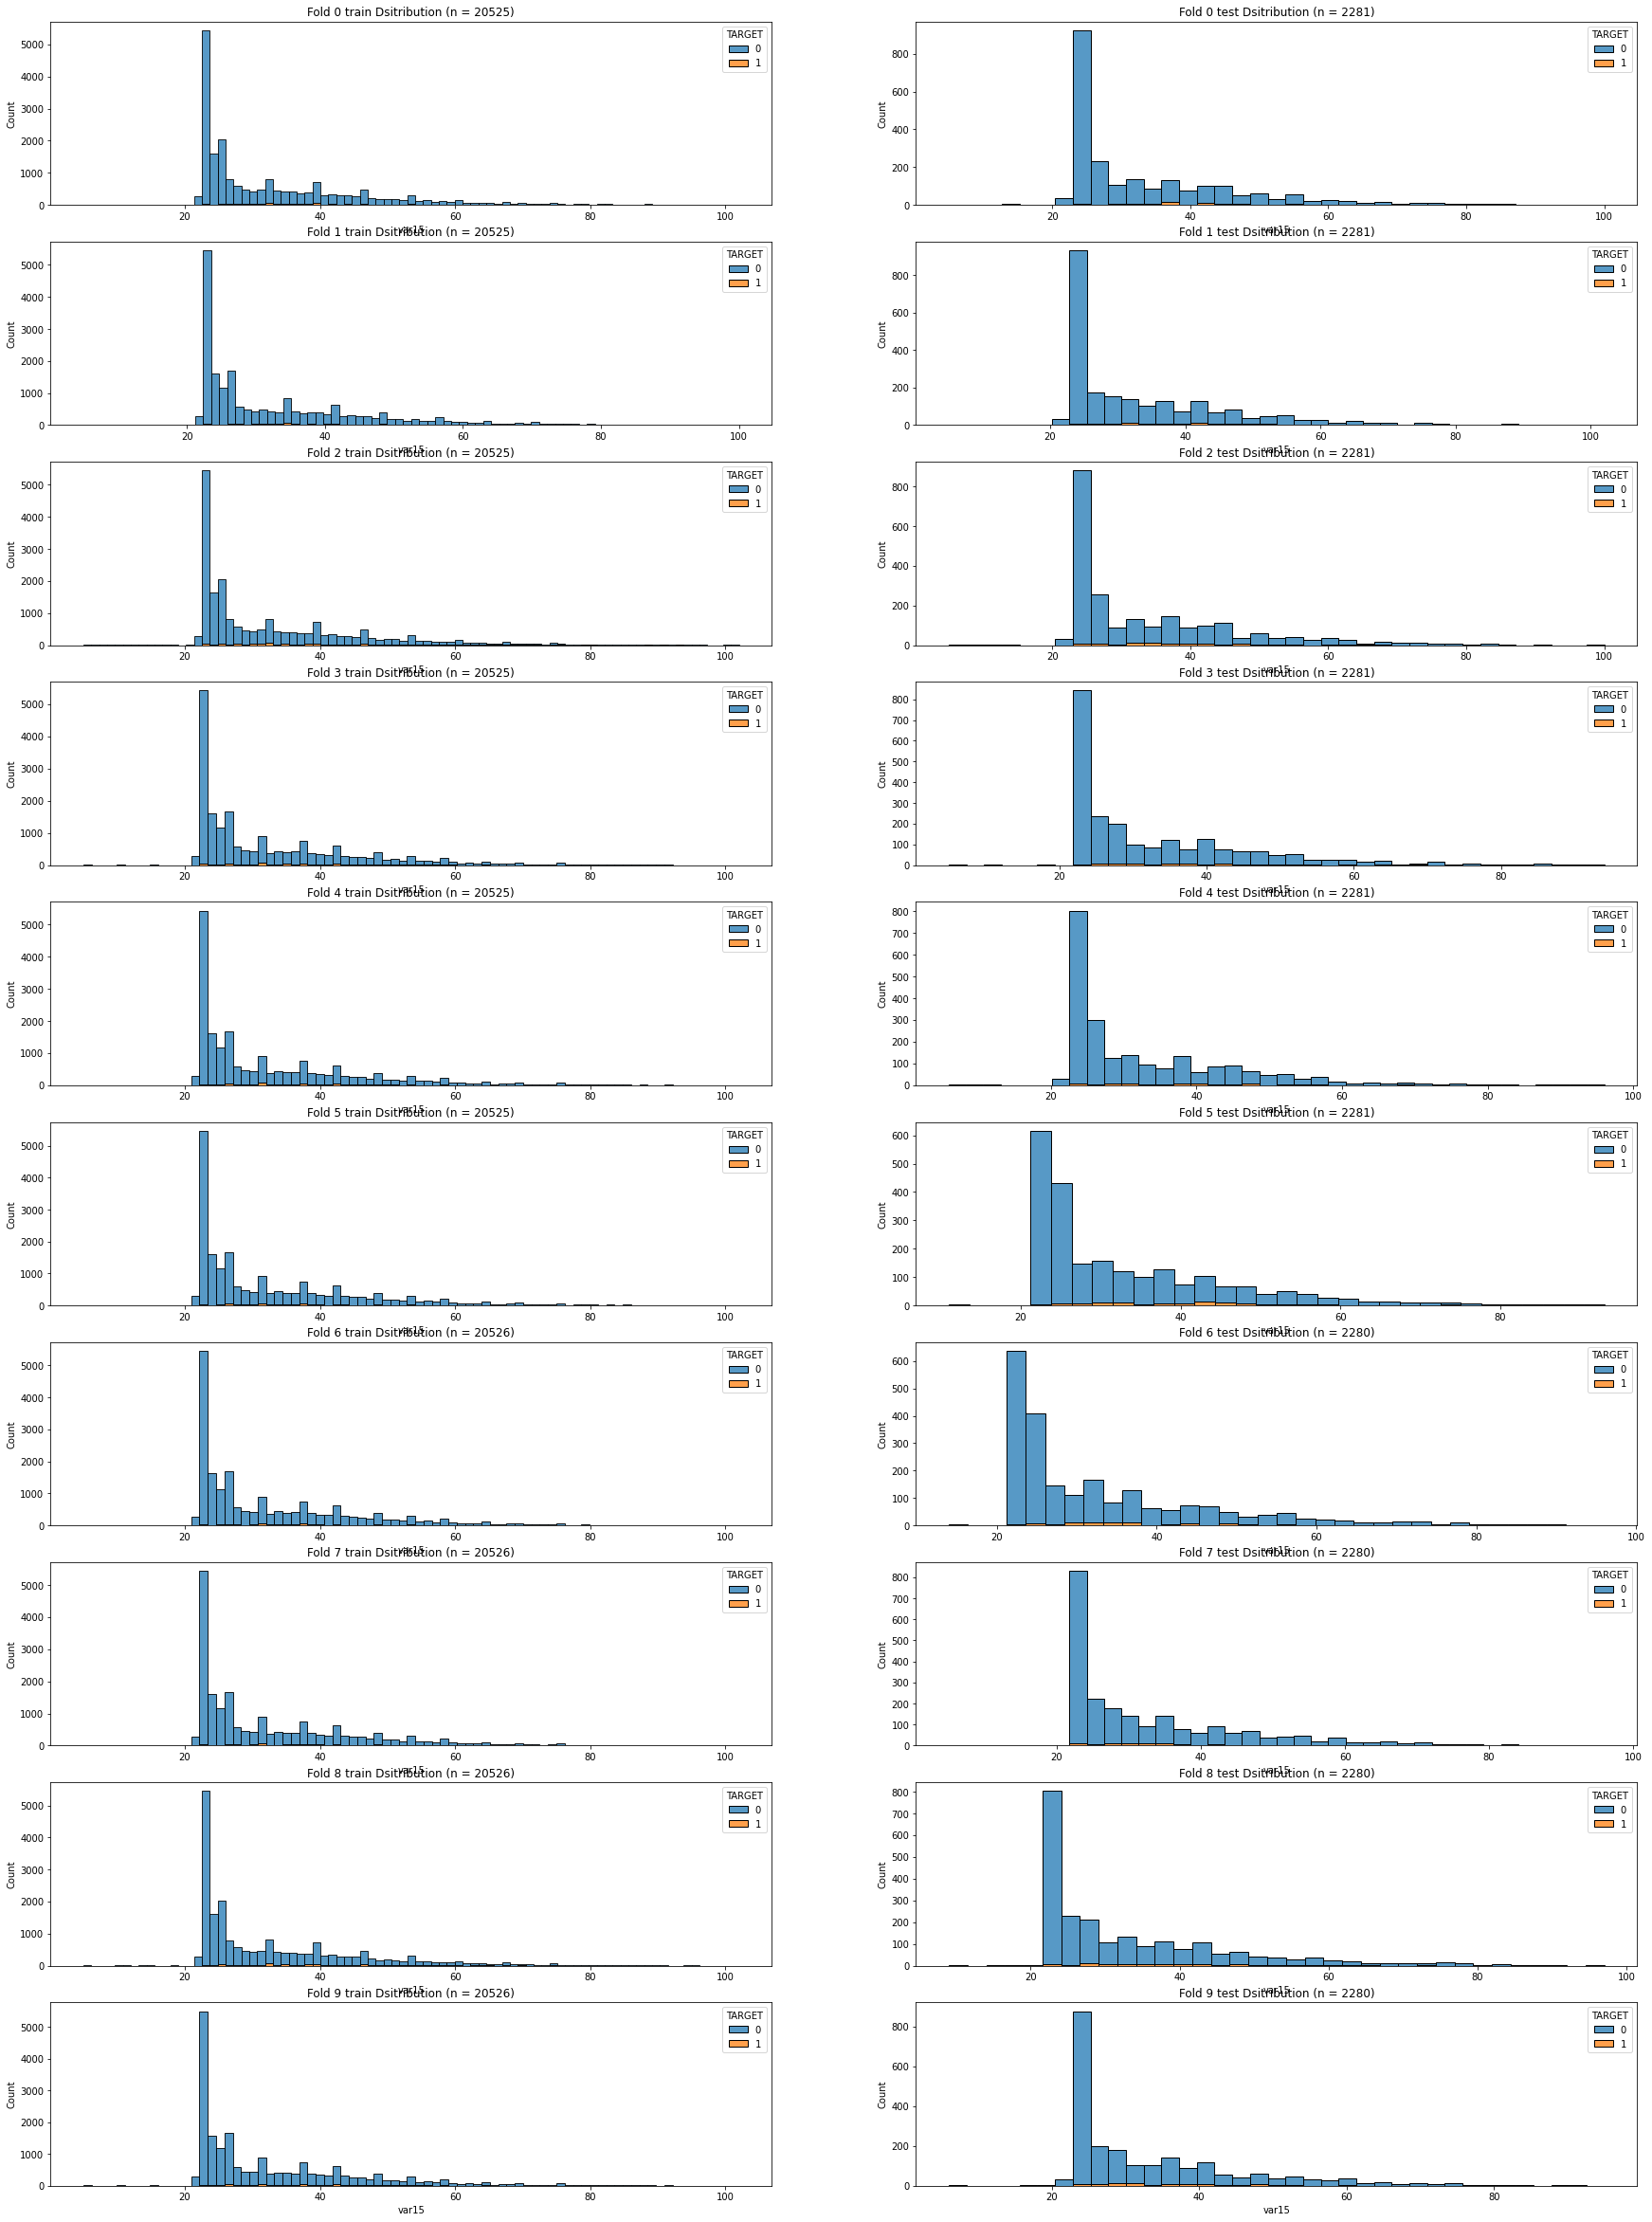

In [ ]:
generate_dist_plots(X = data[X.columns.tolist() + ['TARGET']],dataset = dataset_info,f_name = "var15",label_name = "TARGET")

### Permutation Importance

In [ ]:
def cal_p_importance(dataset_info,X,Y, model , scoring):
    results = []
    print(f'No of feats: {X.shape[1]}')
    for key, value in dataset_info.items():
        print("TRAIN:", len(value['train']), "TEST:", len(value['test']))
        #dataset_info[str(i)] = {'train':indexes[0],'test': indexes[1]}
        X_train, X_test = X.iloc[value['train'],:], X.iloc[value['test'],:]
        y_train, y_test = Y[value['train']], Y[value['test']]
        model.fit(X_train,y_train)
        tmp = permutation_importance(model,X_test ,
                                          y_test,
                                          scoring=scoring)
        results.append(tmp)
    return results

In [ ]:
#results = cal_p_importance(dataset_info,X,Y, model ,scorer_f1)

In [ ]:
def p_imp_over_folds(results,feat):
    df_result = pd.DataFrame()
    for i in range(0,len(results)):
        #print(i)
        df_p = pd.DataFrame({key: value for key , value in results[i].items() if key != 'importances'})
        df_p["fold"] = i+1
        df_result = pd.concat([df_p,df_result])
    idx_feat_map = {i:feat[i] for i in range(0,len(feat))}
    df_result['f_name'] = df_result.reset_index().rename(columns = {'index':'f_name'})['f_name'].map(idx_feat_map)
    df_result_agg = df_result.groupby(['f_name']).agg(np.mean).reset_index()
    df_result_agg['fold'] = 99
    df_result_agg = pd.concat([df_result.reset_index(drop=True),df_result_agg.reset_index(drop=True)],axis=0)
    return df_result_agg

In [ ]:
def plot_p_imp_per_fold_results(p_imp_df,X):
    no_folds = p_imp_df.fold.nunique()
    a = no_folds
    #  Categorical Data
    a = no_folds  # number of rows
    b = 1  # number of columns
    c = 1  # initialize plot counter

    fig = plt.figure(figsize=(60,no_folds*8))

    for i in sorted(p_imp_df.fold.unique()):
        plt.subplot(a, b, c)
        plt.title(f'CV Result for Fold:{i}')
        plt.xticks(np.arange(len(X.columns)),list(X.columns),rotation = 90)
        #ax.set_xticklabels(list(X.columns))
        plt.bar(np.arange(len(X.columns)),
           p_imp_df.query(f'fold == {i}')["importances_mean"].values,
          yerr= p_imp_df.query(f'fold == {i}')["importances_std"].values,
          align = 'center',alpha = 0.5, ecolor= 'black',capsize = 10,orientation = u'vertical')
        plt.grid()
        plt.margins(0.05)
        plt.tight_layout(pad=5)
      # Tweak spacing to prevent clipping of tick-labels
        #plt.subplots_adjust(hspace = 1.5)
        #ax.yaxis.grid(True)
        #sns.countplot(df[i])
        c = c + 1
    #plt.show()
    return fig
    

In [ ]:
def permutation_importance_(dataset_info,X,y,model,scorer):
    results = cal_p_importance(dataset_info,X,y, model ,scorer)
    df_results = p_imp_over_folds(results,X.columns)
    fig = plot_p_imp_per_fold_results(df_results,X)
    return df_results, fig

No of feats: 308
TRAIN: 20525 TEST: 2281
TRAIN: 20525 TEST: 2281
TRAIN: 20525 TEST: 2281
TRAIN: 20525 TEST: 2281
TRAIN: 20525 TEST: 2281
TRAIN: 20525 TEST: 2281
TRAIN: 20526 TEST: 2280
TRAIN: 20526 TEST: 2280
TRAIN: 20526 TEST: 2280
TRAIN: 20526 TEST: 2280


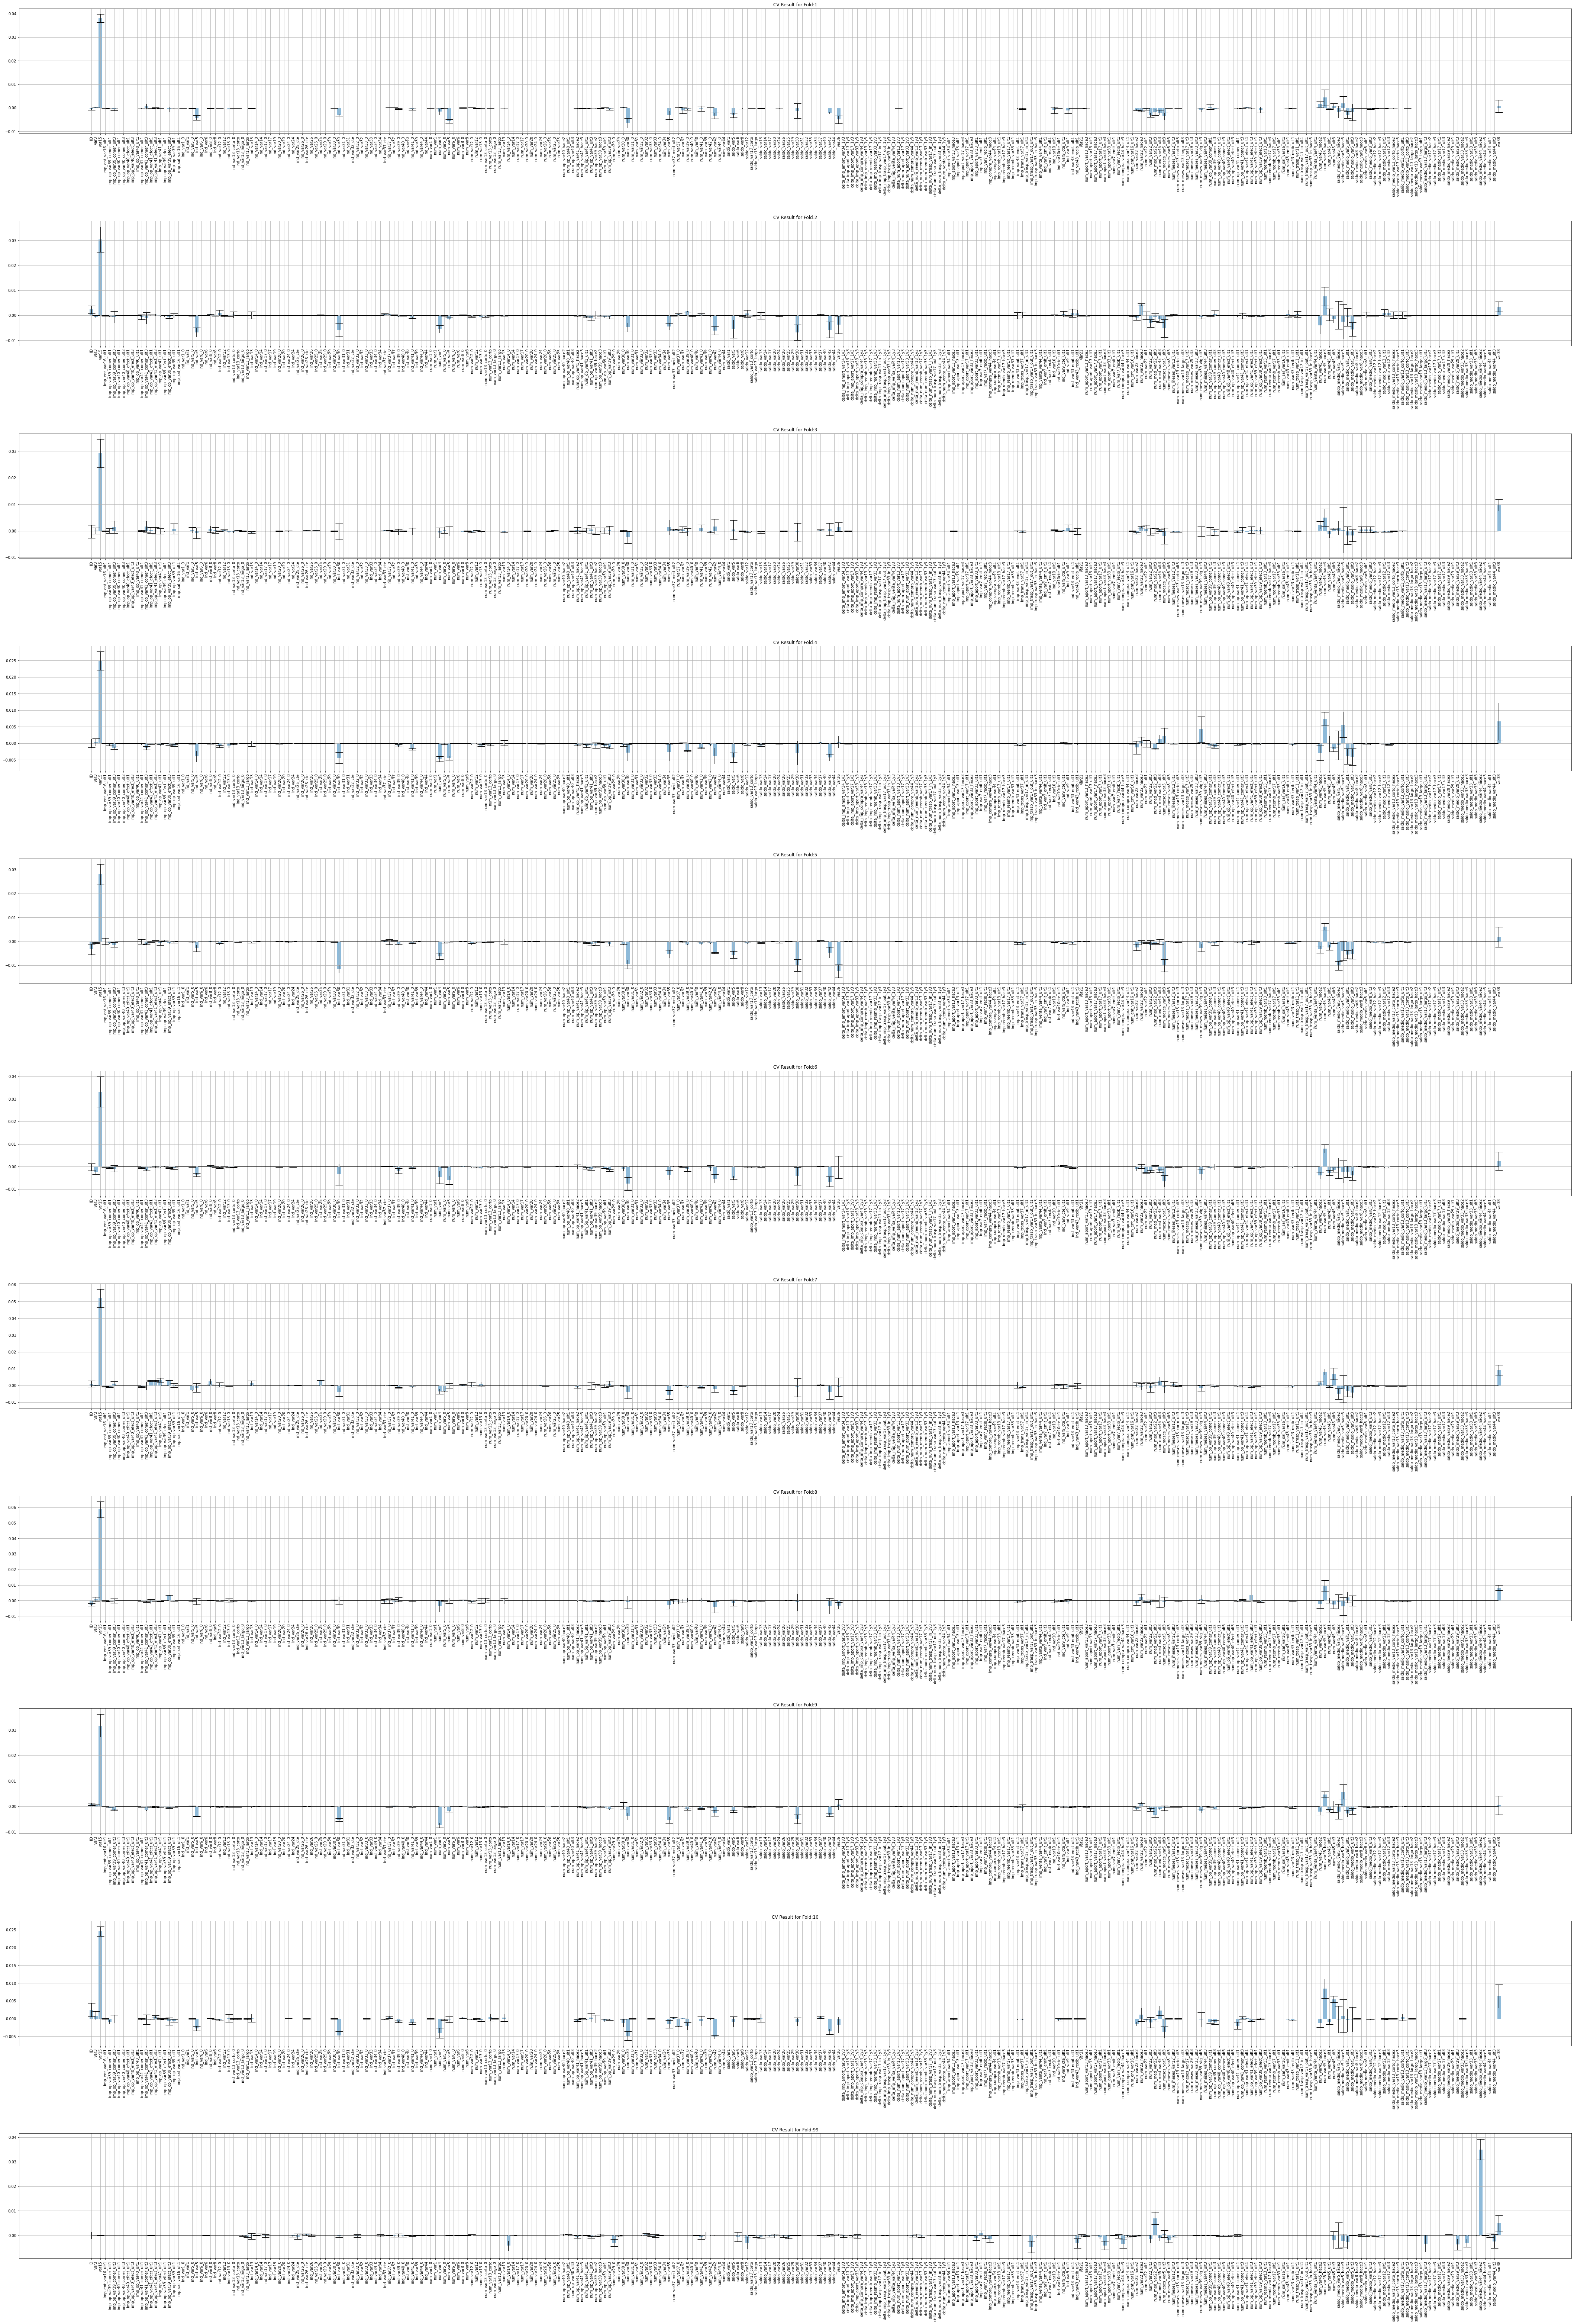

In [ ]:
df_results, fig = permutation_importance_(dataset_info,X,Y,model,scorer_avg_precision)

In [ ]:
df_results

importances_mean  importances_std  fold                   f_name
0               0.003            0.002    10                       ID
1               0.001            0.001    10                     var3
2               0.025            0.001    10                    var15
3              -0.000            0.000    10       imp_ent_var16_ult1
4              -0.001            0.001    10  imp_op_var39_comer_ult1
..                ...              ...   ...                      ...
303             0.035            0.004    99                    var15
304            -0.000            0.000    99                    var21
305            -0.000            0.001    99                     var3
306            -0.002            0.003    99                    var36
307             0.005            0.003    99                    var38

[3388 rows x 4 columns]

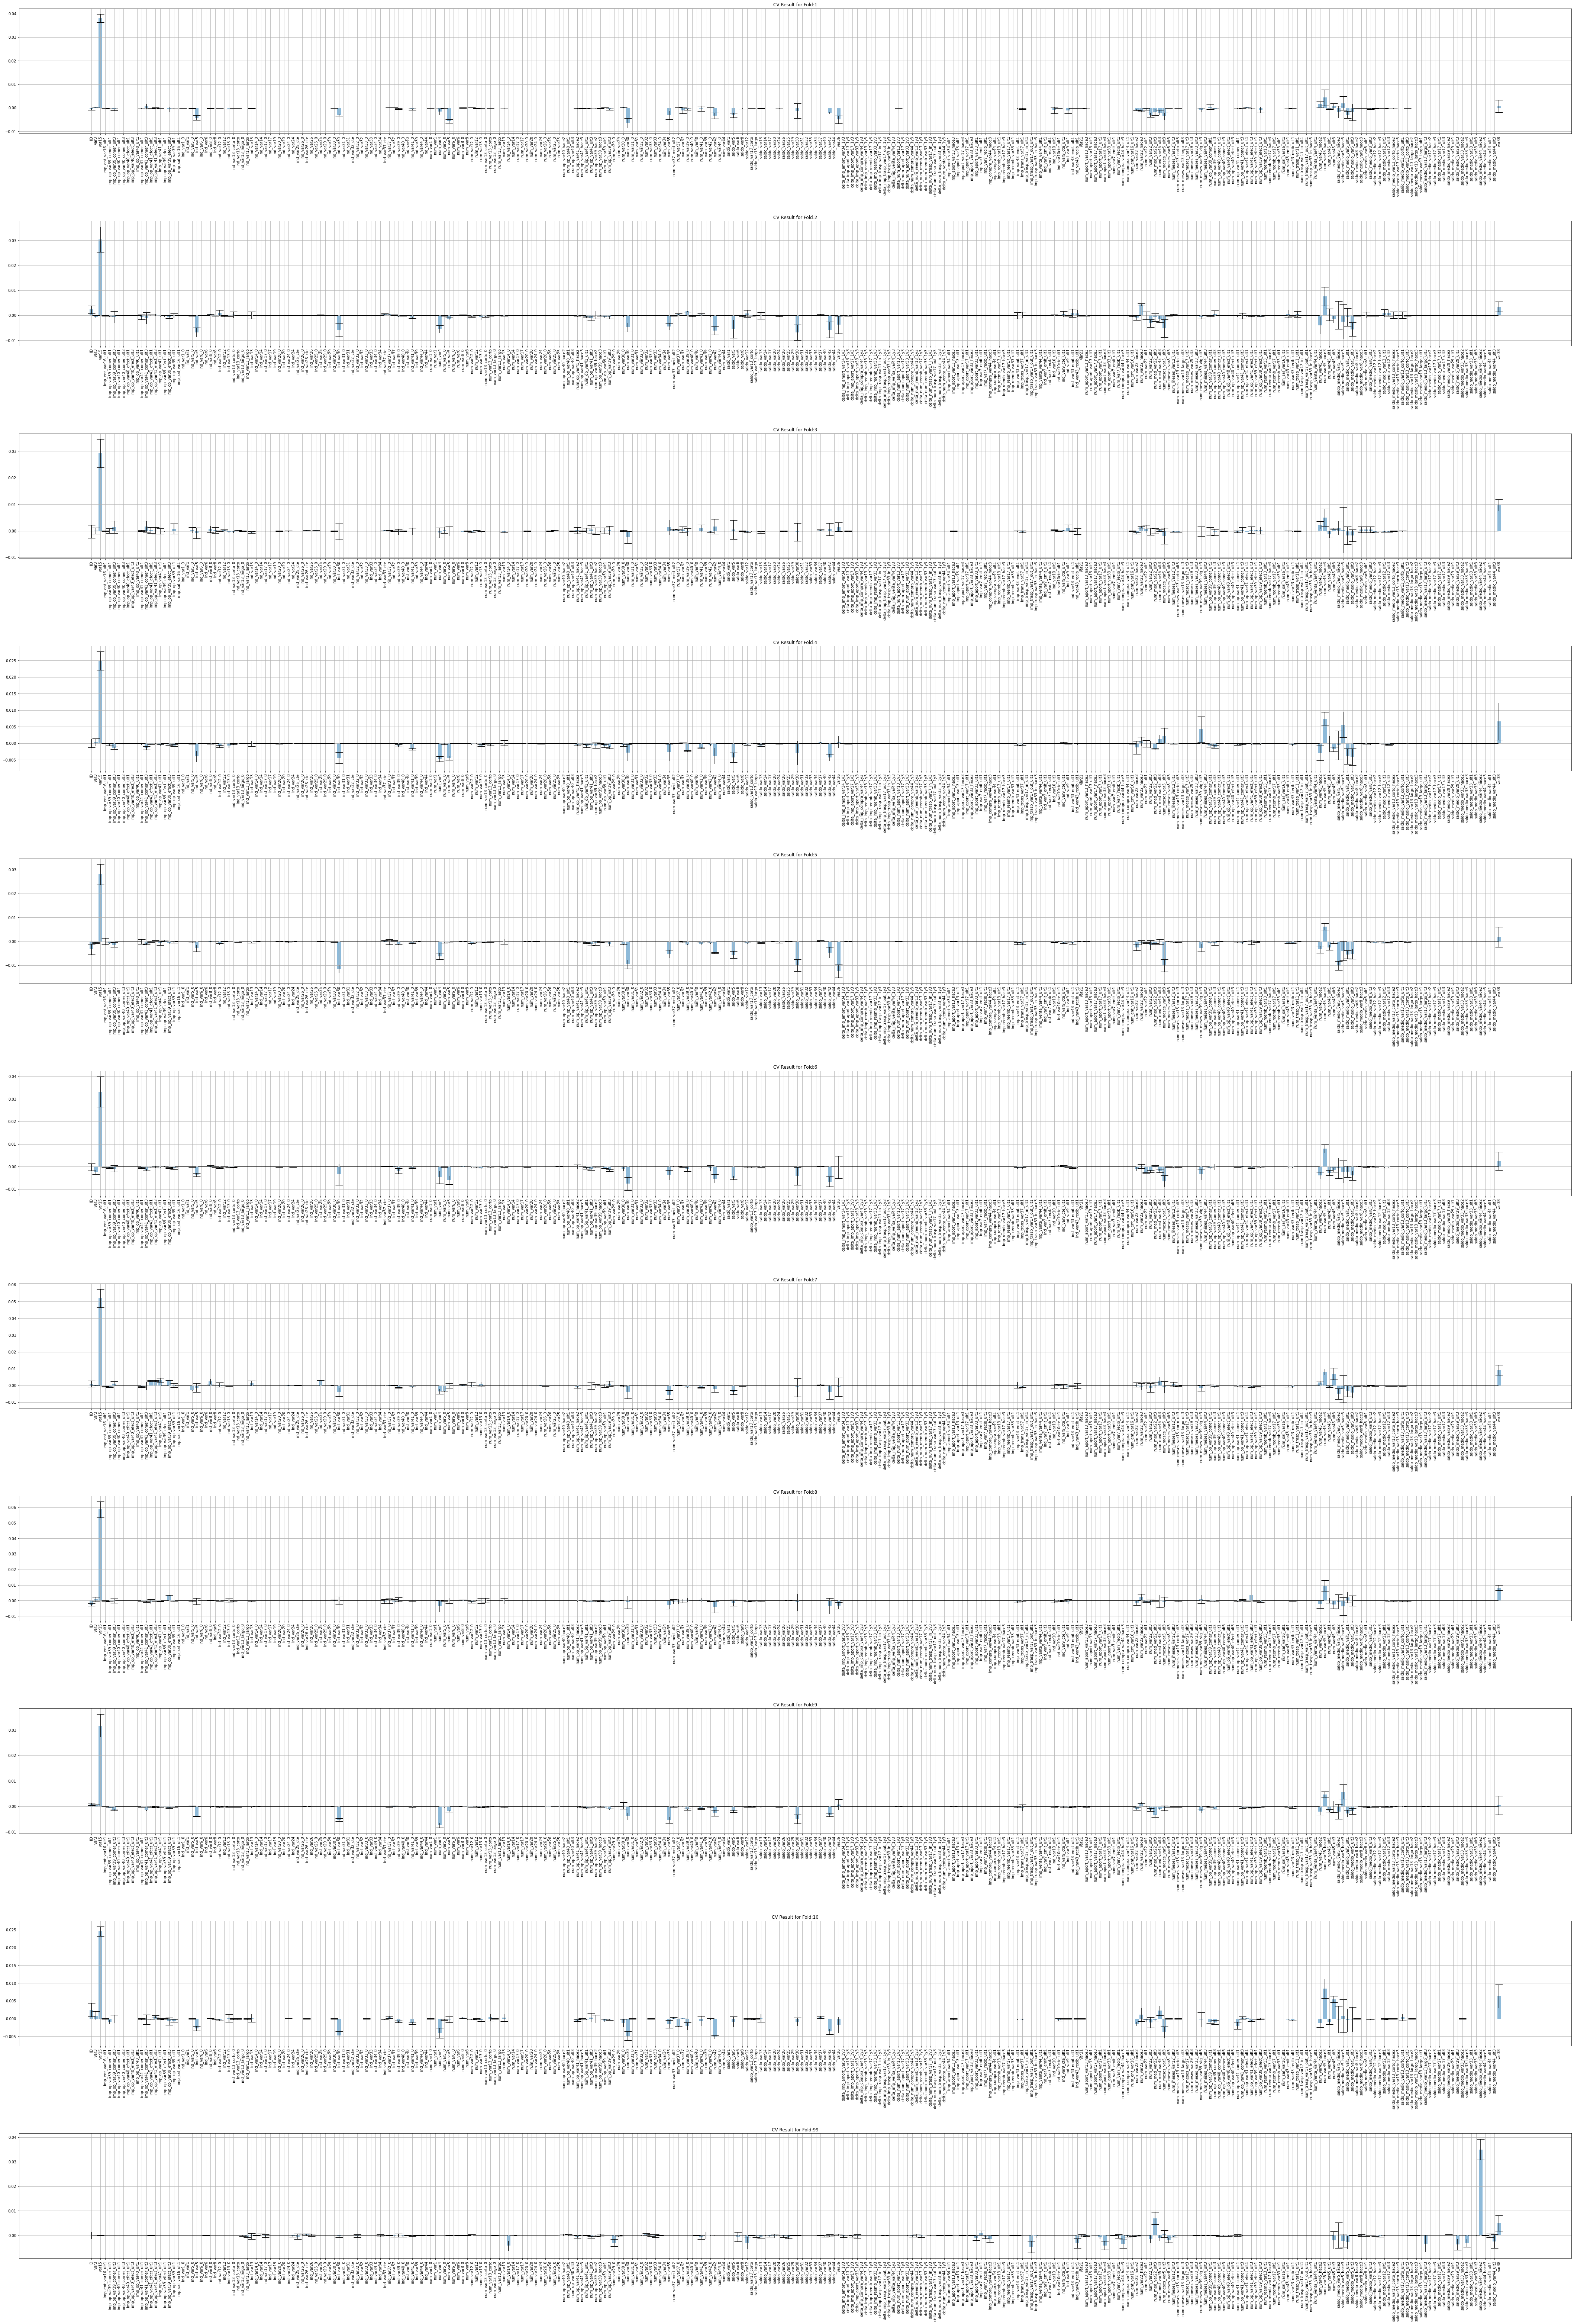

In [ ]:
fig

### Mean Threshold

In [ ]:
from sklearn.feature_selection import SelectFromModel

In [ ]:
rf_select_mean = SelectFromModel(model).fit(X,Y)
print(rf_select_mean.threshold_)
cols = X.columns
rf_cols_to_keep_mean = rf_select_mean.get_support()
rf_cols_to_keep_mean = cols[rf_cols_to_keep_mean]
rf_cols_to_keep_mean = list(rf_cols_to_keep_mean) 
print(f'Features Dropped: \n {set(X.columns).difference(set(rf_cols_to_keep_mean))}\n')
print(f'Features Selected[{len(rf_cols_to_keep_mean)}]:\n {rf_cols_to_keep_mean}\n')

0.003246753246753247
Features Dropped: 
 {'ind_var13_largo', 'imp_var7_recib_ult1', 'saldo_var17', 'num_meses_var29_ult3', 'ind_var9_cte_ult1', 'num_var40_0', 'saldo_medio_var44_hace2', 'ind_var30_0', 'ind_var20', 'ind_var34', 'ind_var8_0', 'var3', 'saldo_medio_var33_ult3', 'num_var31', 'imp_aport_var33_hace3', 'num_var14', 'imp_reemb_var17_hace3', 'num_trasp_var11_ult1', 'delta_num_venta_var44_1y3', 'imp_sal_var16_ult1', 'num_meses_var44_ult3', 'imp_aport_var33_ult1', 'saldo_var32', 'saldo_var26', 'num_op_var40_efect_ult1', 'num_compra_var44_ult1', 'num_var37', 'ind_var39', 'num_var14_0', 'saldo_medio_var8_hace2', 'delta_num_trasp_var33_in_1y3', 'saldo_var8', 'delta_imp_venta_var44_1y3', 'delta_num_compra_var44_1y3', 'num_reemb_var17_ult1', 'num_op_var41_hace2', 'ind_var29_0', 'num_reemb_var17_hace3', 'num_var31_0', 'ind_var33_0', 'saldo_var24', 'num_trasp_var17_out_ult1', 'delta_imp_trasp_var33_in_1y3', 'saldo_medio_var33_hace3', 'num_aport_var17_hace3', 'num_trasp_var33_in_hace3', '

### Feature Importance Threshold

In [ ]:
rf_select_thresh = SelectFromModel(model,threshold=0.005).fit(X,Y)
print(rf_select_thresh.threshold_)
cols = X.columns
rf_cols_to_keep_thresh = rf_select_thresh.get_support()
rf_cols_to_keep_thresh = cols[rf_cols_to_keep_thresh]
rf_cols_to_keep_thresh = list(rf_cols_to_keep_thresh)
print(f'Features Dropped: \n {set(X.columns).difference(set(rf_cols_to_keep_thresh))}\n')
print(f'Features Selected[{len(rf_cols_to_keep_thresh)}]:\n {rf_cols_to_keep_thresh}\n')

0.005
Features Dropped: 
 {'num_var13_largo', 'num_op_var40_hace3', 'num_op_var39_efect_ult1', 'delta_imp_trasp_var33_out_1y3', 'delta_imp_amort_var34_1y3', 'saldo_medio_var29_hace2', 'imp_op_var40_efect_ult3', 'num_var31', 'ind_var20', 'saldo_medio_var8_hace2', 'num_op_var39_hace3', 'num_var37', 'saldo_medio_var13_largo_hace3', 'ind_var40', 'ind_var26_0', 'num_reemb_var33_ult1', 'ind_var13_largo', 'ind_var29_0', 'saldo_medio_var13_medio_ult1', 'ind_var37', 'saldo_medio_var33_ult1', 'imp_aport_var17_ult1', 'num_reemb_var33_hace3', 'ind_var25_0', 'imp_aport_var17_hace3', 'saldo_medio_var12_hace3', 'delta_imp_aport_var33_1y3', 'ind_var29', 'imp_amort_var34_hace3', 'num_var32', 'ind_var10_ult1', 'ind_var31_0', 'ind_var13_medio_0', 'saldo_medio_var12_hace2', 'saldo_medio_var44_hace3', 'num_compra_var44_ult1', 'ind_var19', 'num_meses_var12_ult3', 'imp_trasp_var17_out_hace3', 'num_op_var41_comer_ult1', 'num_var2_0_ult1', 'saldo_var31', 'num_var27_0', 'num_op_var40_comer_ult3', 'num_meses_var

## RFECV

In [ ]:
from sklearn.feature_selection import RFECV

In [ ]:
def RFECV_(rfcev_obj,X,Y,scorer_name = None,rs = 123):
    np.random.seed(rs)
    rfcev_obj.fit(X,Y)
    plt.plot(rfcev_obj.grid_scores_);
    plt.xlabel('Number of Features'); plt.ylabel(f'{scorer_name}'); plt.title('Feature Selection Scores');
    sel_cols = X.columns[rfcev_obj.support_]
    ranking_cols = sorted(list(zip(rfcev_obj.ranking_,X.columns)),key = lambda x: x[0])
    print(sel_cols)
    print(len(sel_cols))
    return sel_cols, ranking_cols

In [ ]:
# Create a model for feature selection
estimator = RandomForestClassifier(random_state = 10,
                                   n_estimators = 100,
                                   n_jobs = -1,
                                   oob_score=True,
                                   criterion='gini',
                                   max_features=0.8,
                                   class_weight='balanced')

# Create the object
selector_avg_precision = RFECV(estimator, step = 1, cv = StratifiedKFold(10), scoring = scorer_avg_precision, n_jobs = -1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


Index(['ID', 'var15', 'saldo_var30', 'saldo_var42', 'num_var45_ult3',
       'saldo_medio_var5_hace3', 'saldo_medio_var5_ult3', 'var38'],
      dtype='object')
8


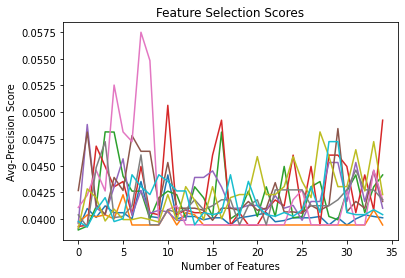

In [ ]:
_,_ = RFECV_(selector_avg_precision,
                X[rf_cols_to_keep_thresh],
                Y,
                'Avg-Precision Score')

## RFECV using Multiple Models

In [ ]:
# explore the algorithm wrapped by RFE
from numpy import mean
from numpy import std
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

In [ ]:
# # get a list of models to evaluate
# def get_models():
#     models = dict()
#     # lr
#     rfe = RFECV(estimator=LogisticRegression(class_weight = 'balanced'),
#                 step = 1,
#                cv = StratifiedKFold(10),
#                scoring = scorer_f1)
    
#     models['lr'] = Pipeline(steps=[('std', StandardScaler()),('lr',rfe)])
    
    
#     rfe = RFECV(estimator=Perceptron(class_weight = 'balanced'),
#                step = 1,
#                     cv = StratifiedKFold(10), 
#                     scoring = scorer_f1)
    
#     models['perc'] = Pipeline(steps=[('min-max', MinMaxScaler()),('perc',rfe)])
    
#     # cart
#     rfe = RFECV(estimator=DecisionTreeClassifier(class_weight = 'balanced'),
#                step = 1,
#                     cv = StratifiedKFold(10), 
#                     scoring = scorer_f1)
#     models['tree'] = Pipeline(steps=[('tree',rfe)])
    
    
#     # rf
#     rfe = RFECV(estimator=RandomForestClassifier(class_weight = 'balanced',criterion ='entropy'),
#                step = 1,
#                     cv = StratifiedKFold(10), 
#                     scoring = scorer_f1)
#     models['rf'] = Pipeline(steps=[('rf',rfe)])
    
#     # gbm
#     rfe = RFECV(estimator=GradientBoostingClassifier(),
#                step = 1,
#                     cv = StratifiedKFold(10), 
#                     scoring = scorer_f1)
#     models['gbm'] = Pipeline(steps=[('gbm',rfe)])
#     return models

In [ ]:
# def RFECV_pipe_(rfcev_obj,model_name,X,Y,scorer_name = None,rs = 123):
#     np.random.seed(rs)
#     rfcev_obj.fit(X,Y)
#     fig , ax = plt.subplots(figsize = (12,8))
#     ax.plot(rfcev_obj[model_name].grid_scores_);
#     ax.set_xlabel('Number of Features'); ax.set_ylabel(f'{scorer_name}'); ax.set_title(f'RFECV-{model_name}');
#     sel_cols = X.columns[rfcev_obj[model_name].support_]
#     ranking_cols = sorted(list(zip(rfcev_obj[model_name].ranking_,X.columns)),key = lambda x: x[0])
#     print(sel_cols)
#     print(len(sel_cols))
#     return sel_cols, ranking_cols, fig

In [ ]:
# models = get_models()
# for model_name, obj in models.items():
#     sel_cols, ranking_cols, fig = RFECV_pipe_(obj,model_name,X,Y,"F1-score")
#     rank_df = pd.DataFrame(ranking_cols,columns = ['rank','f_name'])

## RFECV using D-Tree Models

In [ ]:
# get a list of models to evaluate
def get_models():
    models = dict()
    # lr
    rfe = RFECV(estimator=LogisticRegression(class_weight = 'balanced'),
                step = 1,
               cv = StratifiedKFold(10),
               scoring = scorer_f1)
    
    model = DecisionTreeClassifier(class_weight = 'balanced')
    models['lr_tree'] = Pipeline(steps=[('std', StandardScaler()),('s',rfe),('m',model)])
    
    # perceptron
    rfe = RFECV(estimator=Perceptron(class_weight = 'balanced'),
               step = 1,
                    cv = StratifiedKFold(10), 
                    scoring = scorer_f1)
    
    model = DecisionTreeClassifier(class_weight = 'balanced')
    models['per_tree'] = Pipeline(steps=[('min-max', MinMaxScaler()),('s',rfe),('m',model)])
    
    # cart
    rfe = RFECV(estimator=DecisionTreeClassifier(class_weight = 'balanced'),
               step = 1,
                    cv = StratifiedKFold(10), 
                    scoring = scorer_f1)
    model = DecisionTreeClassifier(class_weight = 'balanced')
    models['tree_tree'] = Pipeline(steps=[('s',rfe),('m',model)])
    
    
    # rf
    rfe = RFECV(estimator=RandomForestClassifier(class_weight = 'balanced',criterion ='entropy'),
               step = 1,
                    cv = StratifiedKFold(10), 
                    scoring = scorer_f1)
    model = DecisionTreeClassifier(class_weight = 'balanced')
    models['rf_tree'] = Pipeline(steps=[('s',rfe),('m',model)])
    
    # gbm
    rfe = RFECV(estimator=GradientBoostingClassifier(),
               step = 1,
                    cv = StratifiedKFold(10), 
                    scoring = scorer_f1)
    model = DecisionTreeClassifier(class_weight = 'balanced')
    models['gbm_tree'] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y,scoring = 'accuracy'):
    cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=1)
    scores = cross_validate(model, X, y, scoring=scoring, cv=cv, n_jobs=-1,return_estimator = True)
    return scores

In [ ]:
def rfecv_comparision(models,X,y,score):
    results, names = list(), list()
    scores = dict()
    for name, model in models.items():
        results = evaluate_model(model, X,Y,score)
        results_score = {key:values for key,values in results.items() if key.startswith('test')}
        scores[name] = results_score

    #no_metrics = [len(val) for val in scores.values()][0]
    metric_names = list([val.keys() for val in scores.values()][0])


    plot_scores = list()
    model_names = scores.keys()
    for i in metric_names:
        sc = []
        sc = [values[i] for key, values in scores.items()]
        plot_scores.append(sc)
    return plot_scores,metric_names,model_names
    

In [ ]:
def create_rfecv_df(plot_scores,metric_names,model_names):
    df = pd.DataFrame()
    for index,i in enumerate(plot_scores):
        #print(i)
        temp = pd.DataFrame(i)
        temp['metric'] = metric_names[index]
        temp['model'] = model_names
        df = pd.concat([df,temp])
    return df

In [ ]:
def rfecv_plot(plot_scores,model_names,metric_names):

    a = len(plot_scores)  # number of rows
    b = 1  # number of columns
    c = 1  # initialize plot counter

    fig = plt.figure(figsize=(10,22))
    for i in range(0,len(plot_scores)): # no of folds in split

        ax = plt.subplot(a, 1, c)
        plt.boxplot(plot_scores[i],showmeans = True,labels = model_names);
        plt.title(f' {metric_names[i]}')
        plt.xlabel('Algorithms')
        plt.tight_layout(pad =2)
        c=c+1
        
    return fig

In [ ]:
models = get_models()
plot_scores,metric_names,model_names = rfecv_comparision(models,X[rf_cols_to_keep_thresh],Y,score)
fig = rfecv_plot(plot_scores,model_names,metric_names)
df_results = create_rfecv_df(plot_scores,metric_names,model_names)

##Feature Selection using Shap

In [ ]:
!pip3 install shap==0.40

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 564 kB 4.6 MB/s 
  Attempting uninstall: shap
    Found existing installation: shap 0.38.1
    Uninstalling shap-0.38.1:
      Successfully uninstalled shap-0.38.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
probatus 1.8.9 requires shap<0.39.0,>=0.38.1, but you have shap 0.40.0 which is incompatible.


In [ ]:
from probatus.feature_elimination import ShapRFECV

In [ ]:
# get a list of models to evaluate
def get_models():
    models = dict()
    # lr
#     rfe = SequentialFeatureSelector(estimator=LogisticRegression(class_weight = 'balanced'),
#                                    direction = 'backward',
#                                    cv = StratifiedKFold(5),scoring = scorer_f1 )
    
#     model = DecisionTreeClassifier(class_weight = 'balanced')
#     models['lr_tree'] = Pipeline(steps=[('std', StandardScaler()),('s',rfe),('m',model)])
    # perceptron
#     rfe = SequentialFeatureSelector(estimator=Perceptron(class_weight = 'balanced'),
#                direction = 'backward',
#                 cv = StratifiedKFold(5),scoring = scorer_f1)
    
#     model = DecisionTreeClassifier(class_weight = 'balanced')
#     models['per_tree'] = Pipeline(steps=[('min-max', MinMaxScaler()),('s',rfe),('m',model)])
    # cart

    model = DecisionTreeClassifier(class_weight = 'balanced',random_state=123)
    models['tree'] = model
    # rf
    
    model = RandomForestClassifier(class_weight = 'balanced',random_state=123)
    models['rf'] = model
    
    #etrees
    model = ExtraTreesClassifier(class_weight = 'balanced',random_state=123)
    models['etree'] = model
    # gbm
    
    model = GradientBoostingClassifier()
    models['gbm'] = model
    return models

In [ ]:
models = get_models()
for model_name, obj in models.items():
    shap_obj = ShapRFECV(obj,
            scoring = 'f1',
            cv = StratifiedKFold(10),
            n_jobs = -1,
            random_state=123)
    shap_fe_df = shap_obj.fit_compute(X = X,
                                        y = Y,
                                        column_names = X.columns,
                                        check_additivity=False)
    
fig = shap_obj.plot(figsize = (50,12))

https://www.kaggle.com/code/prashant111/comprehensive-guide-on-feature-selection/notebook